In [26]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import os 
import xarray as xr
import rioxarray as rio
import numpy as np 
import contextily as cx


In [19]:
fp = os.path.join('data','Eaton_Perimeter_20250121','Eaton_Perimeter_20250121.shp')
eaton_perimeter = gpd.read_file(fp)

fp = os.path.join('data','Palisades_Perimeter_20250121','Palisades_Perimeter_20250121.shp')
palisades_perimeter = gpd.read_file(fp)

netcdf = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

fp = os.path.join('data', 'EJI_2024_California', 'EJI_2024_California.gdb')
eji_ca = gpd.read_file(fp)

1. Explore data 

 * Percentage of housing units that are renter occupied: E_RENTER
 * Percentage of persons who are unisured: E_UNINSUR
 * 65+: E_AGE65
 * proportion of greenspace: E_PARK

## 2. Polygon intersection

In [ ]:
# From previous exploration i know the crs do not match 
# Spatially join EJI with palisades
pali_eji = gpd.sjoin(eji_ca.to_crs(palisades_perimeter.crs), palisades_perimeter) 

<Axes: >

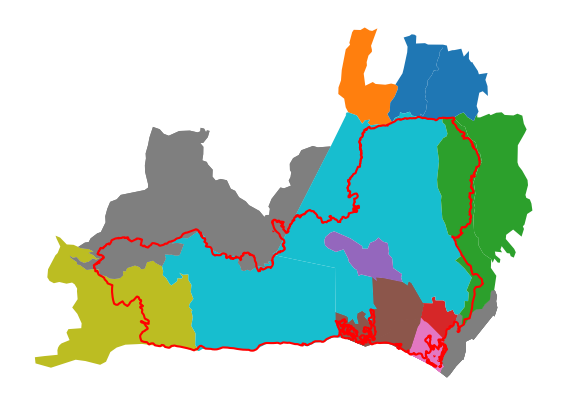

In [15]:
fig, ax = plt.subplots(figsize = (11,5))
ax.axis('off')
pali_eji.plot('TRACTCE',
              ax = ax)

palisades_perimeter.plot(ax = ax,
                    color = 'none',
                    edgecolor = 'red',
                    linewidth = 1.5)

Intersects makes the inclusion of census tracts that are touching the fire, see orange. Census tracrs are larger than the perimeter

<Axes: >

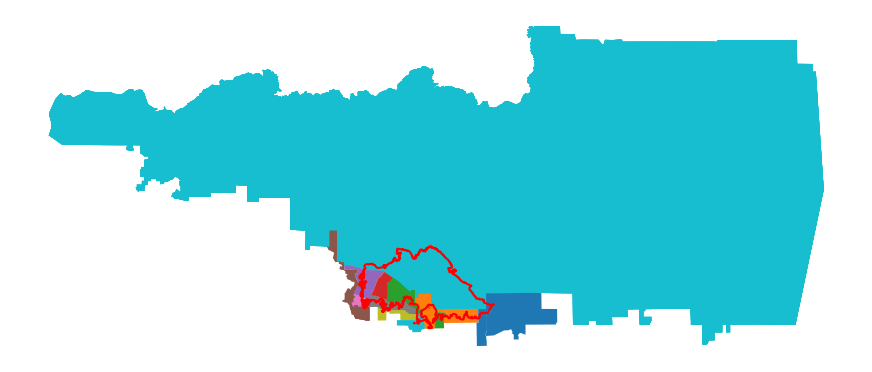

In [17]:
# Eaton fire

# From previous exploration i know the crs do not match 
# Spatially join EJI with palisades
eaton_eji = gpd.sjoin(eji_ca.to_crs(eaton_perimeter.crs), eaton_perimeter) 

fig, ax = plt.subplots(figsize = (11,5))
ax.axis('off')
eaton_eji.plot('TRACTCE',
              ax = ax)

eaton_perimeter.plot(ax = ax,
                    color = 'none',
                    edgecolor = 'red',
                    linewidth = 1.5)

The large size of certain census tracts makes the intersection yield a super huge area, even though the fire perimeter may barely touch census tracts. 

# Polygon clipping 


In [22]:
eji_ca = eji_ca.to_crs(palisades_perimeter.crs)
clip_eji_pali = gpd.clip(eji_ca, palisades_perimeter)
clip_eji_eaton = gpd.clip(eji_ca, eaton_perimeter)

<Axes: >

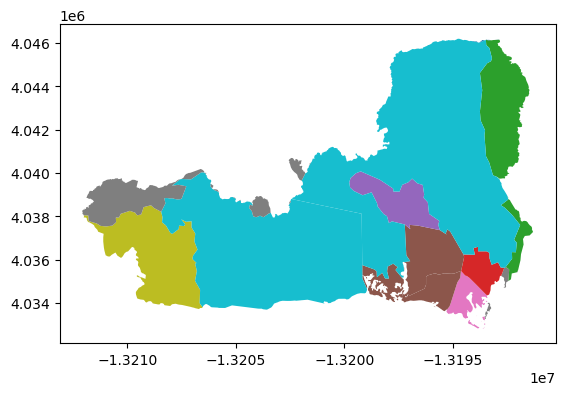

In [24]:
clip_eji_pali.plot('TRACTCE')

<Axes: >

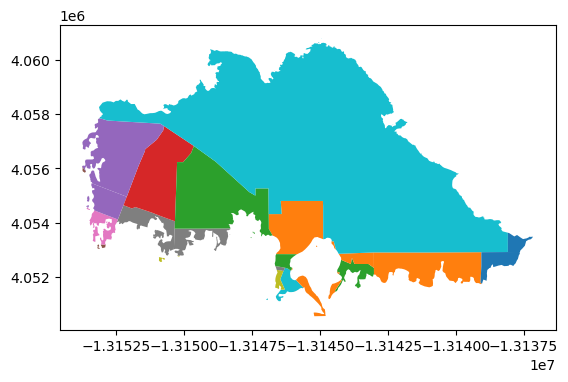

In [25]:
clip_eji_eaton.plot('TRACTCE')

## Visualize fire perimeters with a basemap 


<Axes: >

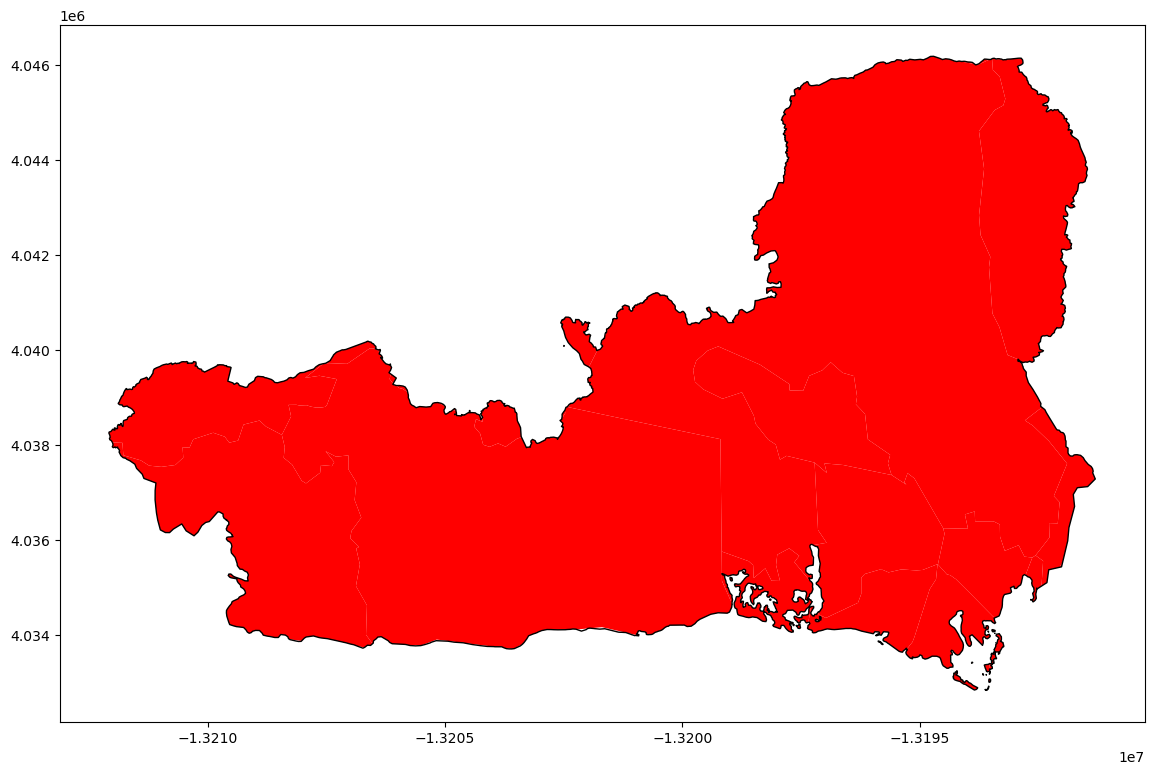

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (14,12))

ctx.add_basemap(ax, source =)
clip_eji_pali.plot( ax = ax, facecolor = 'red')

palisades_perimeter.plot(ax=ax, color = 'none', edgecolor = 'black')